In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
with open("dft_pds/2b_all_pd_equilibrium", 'rb') as pickle_file:
    equil_pd_2b = pickle.load(pickle_file)

with open("dft_pds/3b_all_pd_equilibrium", 'rb') as pickle_file:
    equil_pd_3b = pickle.load(pickle_file)

with open("dft_pds/4b_all_pd_equilibrium", 'rb') as pickle_file:
    equil_pd_4b = pickle.load(pickle_file)

# Combine the arrays along the second axis (axis=1)
all_array = np.concatenate((equil_pd_2b, equil_pd_3b, equil_pd_4b), axis=2)
print(np.shape(all_array))
all_array = all_array.reshape(-1,all_array.shape[2])
print(np.shape(all_array))

# Create labels array
# Define the maximum number of repetitions for each number
max_repetitions = 13
# Define the range of numbers from 0 to 11
numbers_range = np.arange(12)
# Create the array
labels = np.repeat(numbers_range, max_repetitions)
print(np.shape(labels))
all_equilibrium_df = pd.DataFrame(all_array)

# Add the labels as a new column to the DataFrame
all_equilibrium_df['label'] = labels


(12, 13, 180)
(156, 180)
(156,)


(13, 181)
(13, 180)


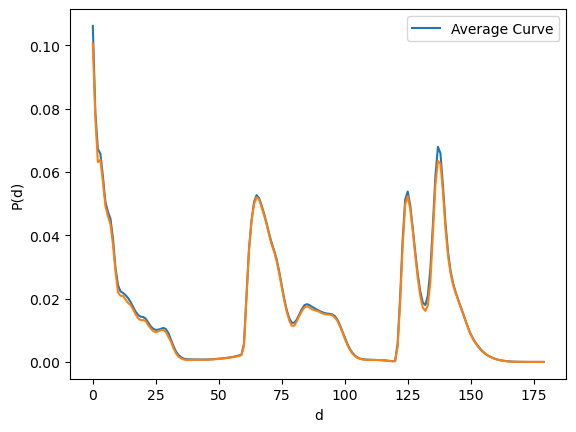

In [7]:
# Filter the DataFrame to ignore rows where the label is 1
df_for_analysis = all_equilibrium_df[all_equilibrium_df['label'] == 1]
print(np.shape(df_for_analysis))
# Drop the 'label' column
df_for_analysis = df_for_analysis.drop(columns=['label'])
print(np.shape(df_for_analysis))

# Calculate the mean for each column
avg_row = df_for_analysis.mean()

# Calculate the standard error of the mean (SEM) for each column
sem_row = df_for_analysis.sem()

# Calculate the 90% confidence interval (CI) for each column
ci_90 = 10.645 * sem_row  # Assuming a large sample size for z = 1.645

# Plot the resulting curve and the 90% CI
plt.plot(avg_row, label='Average Curve')
#plt.fill_between(avg_row.index, avg_row - ci_90, avg_row + ci_90, color='orange', alpha=0.2, label='90% CI')
plt.plot(avg_row-ci_90)
plt.xlabel('d')
plt.ylabel('P(d)')
plt.legend()
plt.show()